<a href="https://colab.research.google.com/github/Mohamed-Abgalow/Computer-Vision-image-classification/blob/main/feature_extraction_%26_image_classification_using_ML_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import scipy
import pickle as pickle
import random
import os
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
# Feature extractor
def extract_features(image_path, vector_size=32):
    image = imread(image_path)
    try:
        # Using KAZE, cause SIFT, ORB and other was moved to additional module
        # which is adding addtional pain during install
        alg = cv2.KAZE_create()
        #alg = cv2.ORB_create()
        # Dinding image keypoints
        kps = alg.detect(image)
        # Getting first 32 of them. 
        # Number of keypoints is varies depend on image size and color pallet
        # Sorting them based on keypoint response value(bigger is better)
        kps = sorted(kps, key=lambda x: -x.response)[:vector_size]
        # computing descriptors vector
        kps, dsc = alg.compute(image, kps)
        # Flatten all of them in one big vector - our feature vector
        dsc = dsc.flatten()
        # Making descriptor of same size
        # Descriptor vector size is 64
        needed_size = (vector_size * 64)
        if dsc.size < needed_size:
            # if we have less the 32 descriptors then just adding zeros at the
            # end of our feature vector
            dsc = np.concatenate([dsc, np.zeros(needed_size - dsc.size)])
    except cv2.error as e:
        print('Error: %s'%(e))
        return None

    return dsc

In [ ]:
def batch_extractor(images_path, pickled_db_path="features.pck"):
    files = [os.path.join(images_path, p) for p in sorted(os.listdir(images_path))]

    result = {}
    for f in files:
        #print('Extracting features from image %s'%(f))
        name = f.split('/')[-1].lower()
        result[name] = extract_features(f)
    #print(type(result))
        
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'wb') as fp:
        #fp.writelines('Hello, world')
        pickle.dump(result, fp)

In [ ]:
images_path = ('/content/drive/MyDrive/Computer VIsion Final /images/cropped')

In [ ]:
pickled_db_path="/content/features.pck"
with open(pickled_db_path, 'rb') as fp:
        data = pickle.load(fp)
        #print(data)
        names = []
        matrix = []
        for k, v in data.items():
            names.append(k)
            matrix.append(v)
        matrix = np.array(matrix)
        names = np.array(names)

In [ ]:
print(matrix)

[[-0.0318232  -0.05933593  0.08912753 ... -0.01403802  0.05170161
   0.04181656]
 [ 0.00364999 -0.00238474  0.01495439 ...  0.03278582  0.04079996
   0.04856307]
 [ 0.01528041 -0.03839725  0.17557581 ... -0.00059603  0.09062714
   0.0804603 ]
 ...
 [-0.02063328  0.01557192  0.08718482 ...  0.01343102  0.06744209
   0.09543696]
 [-0.01667236  0.01204513  0.08593921 ... -0.04319395  0.09843884
   0.15858975]
 [-0.01664251  0.014123    0.08693948 ...  0.05193381  0.09634834
   0.09247608]]


In [ ]:
import pandas as pd

In [ ]:
df_features = pd.DataFrame(matrix)

In [ ]:
df_features

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.031823,-0.059336,0.089128,0.112820,0.126809,-0.188655,0.141862,0.240462,-0.058686,-0.338650,...,0.251449,0.173262,-0.103849,0.004466,0.293966,0.256106,-0.034425,-0.014038,0.051702,0.041817
1,0.003650,-0.002385,0.014954,0.014032,0.016165,-0.010320,0.023292,0.019712,-0.004304,-0.007683,...,0.141161,0.161695,-0.022069,-0.003221,0.038315,0.050762,0.020201,0.032786,0.040800,0.048563
2,0.015280,-0.038397,0.175576,0.112583,0.019944,-0.085175,0.100695,0.137047,-0.012863,-0.050347,...,0.162314,0.130570,0.005425,-0.003387,0.165129,0.136536,-0.011376,-0.000596,0.090627,0.080460
3,0.053029,-0.026531,0.196620,0.076452,0.057050,-0.060555,0.142660,0.106446,-0.038775,-0.085638,...,0.112010,0.108077,-0.030517,-0.008810,0.045186,0.034784,0.001838,0.008269,0.020538,0.019187
4,-0.000500,0.002814,0.020334,0.028433,-0.014350,0.020119,0.030017,0.043121,0.008401,0.001591,...,0.013389,0.016820,0.006015,0.007085,0.009459,0.009836,0.008430,0.009136,0.008430,0.009247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.006947,0.020517,0.087057,0.077155,0.034087,-0.015797,0.157865,0.158943,-0.022269,-0.117026,...,0.131803,0.098502,-0.030738,0.073817,0.140159,0.136751,0.002975,0.034883,0.091069,0.074615
418,-0.019943,0.014913,0.086590,0.079894,0.005283,-0.079455,0.101405,0.147979,0.003624,-0.057439,...,0.155749,0.069638,-0.011128,-0.008941,0.133564,0.119110,-0.022877,-0.005908,0.084627,0.114747
419,-0.020633,0.015572,0.087185,0.080287,0.004994,-0.079201,0.098848,0.147235,0.002134,-0.058430,...,0.229016,0.167345,-0.064498,0.113165,0.145580,0.181312,0.005625,0.013431,0.067442,0.095437
420,-0.016672,0.012045,0.085939,0.082251,0.002980,-0.081873,0.108598,0.152934,0.000953,-0.057318,...,0.146827,0.156582,-0.053846,-0.073670,0.191781,0.261587,0.005328,-0.043194,0.098439,0.158590


In [ ]:
df_names =  pd.DataFrame(names)

In [ ]:
df_names

,0
0,bananas_1.jpg
1,bananas_10.jpg
2,bananas_100.jpg
3,bananas_101.jpg
4,bananas_102.jpg
...,...
417,cassava_95.jpg
418,cassava_96.jpg
419,cassava_97.jpg
420,cassava_98.jpg


In [ ]:
df_all = pd.merge(df_features, df_names, left_index=True, right_index=True)

In [ ]:
df_all

,0_x,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,0_y
0,-0.031823,-0.059336,0.089128,0.112820,0.126809,-0.188655,0.141862,0.240462,-0.058686,-0.338650,...,0.173262,-0.103849,0.004466,0.293966,0.256106,-0.034425,-0.014038,0.051702,0.041817,bananas_1.jpg
1,0.003650,-0.002385,0.014954,0.014032,0.016165,-0.010320,0.023292,0.019712,-0.004304,-0.007683,...,0.161695,-0.022069,-0.003221,0.038315,0.050762,0.020201,0.032786,0.040800,0.048563,bananas_10.jpg
2,0.015280,-0.038397,0.175576,0.112583,0.019944,-0.085175,0.100695,0.137047,-0.012863,-0.050347,...,0.130570,0.005425,-0.003387,0.165129,0.136536,-0.011376,-0.000596,0.090627,0.080460,bananas_100.jpg
3,0.053029,-0.026531,0.196620,0.076452,0.057050,-0.060555,0.142660,0.106446,-0.038775,-0.085638,...,0.108077,-0.030517,-0.008810,0.045186,0.034784,0.001838,0.008269,0.020538,0.019187,bananas_101.jpg
4,-0.000500,0.002814,0.020334,0.028433,-0.014350,0.020119,0.030017,0.043121,0.008401,0.001591,...,0.016820,0.006015,0.007085,0.009459,0.009836,0.008430,0.009136,0.008430,0.009247,bananas_102.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.006947,0.020517,0.087057,0.077155,0.034087,-0.015797,0.157865,0.158943,-0.022269,-0.117026,...,0.098502,-0.030738,0.073817,0.140159,0.136751,0.002975,0.034883,0.091069,0.074615,cassava_95.jpg
418,-0.019943,0.014913,0.086590,0.079894,0.005283,-0.079455,0.101405,0.147979,0.003624,-0.057439,...,0.069638,-0.011128,-0.008941,0.133564,0.119110,-0.022877,-0.005908,0.084627,0.114747,cassava_96.jpg
419,-0.020633,0.015572,0.087185,0.080287,0.004994,-0.079201,0.098848,0.147235,0.002134,-0.058430,...,0.167345,-0.064498,0.113165,0.145580,0.181312,0.005625,0.013431,0.067442,0.095437,cassava_97.jpg
420,-0.016672,0.012045,0.085939,0.082251,0.002980,-0.081873,0.108598,0.152934,0.000953,-0.057318,...,0.156582,-0.053846,-0.073670,0.191781,0.261587,0.005328,-0.043194,0.098439,0.158590,cassava_98.jpg


Now we add a classification column to the dataframe

0 - Cassava  
1 - Banana

In [ ]:
def image_class (row): 
   if 'banana' in row['0_y'] :
      return '1'
   if 'cassava' in row['0_y'] :
      return '0'
   return '2'


In [ ]:
df_all['class_label'] = df_all.apply (lambda row: image_class(row), axis=1)

In [ ]:
df_all

,0_x,1,2,3,4,5,6,7,8,9,...,2040,2041,2042,2043,2044,2045,2046,2047,0_y,class_label
0,-0.031823,-0.059336,0.089128,0.112820,0.126809,-0.188655,0.141862,0.240462,-0.058686,-0.338650,...,-0.103849,0.004466,0.293966,0.256106,-0.034425,-0.014038,0.051702,0.041817,bananas_1.jpg,1
1,0.003650,-0.002385,0.014954,0.014032,0.016165,-0.010320,0.023292,0.019712,-0.004304,-0.007683,...,-0.022069,-0.003221,0.038315,0.050762,0.020201,0.032786,0.040800,0.048563,bananas_10.jpg,1
2,0.015280,-0.038397,0.175576,0.112583,0.019944,-0.085175,0.100695,0.137047,-0.012863,-0.050347,...,0.005425,-0.003387,0.165129,0.136536,-0.011376,-0.000596,0.090627,0.080460,bananas_100.jpg,1
3,0.053029,-0.026531,0.196620,0.076452,0.057050,-0.060555,0.142660,0.106446,-0.038775,-0.085638,...,-0.030517,-0.008810,0.045186,0.034784,0.001838,0.008269,0.020538,0.019187,bananas_101.jpg,1
4,-0.000500,0.002814,0.020334,0.028433,-0.014350,0.020119,0.030017,0.043121,0.008401,0.001591,...,0.006015,0.007085,0.009459,0.009836,0.008430,0.009136,0.008430,0.009247,bananas_102.jpg,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,0.006947,0.020517,0.087057,0.077155,0.034087,-0.015797,0.157865,0.158943,-0.022269,-0.117026,...,-0.030738,0.073817,0.140159,0.136751,0.002975,0.034883,0.091069,0.074615,cassava_95.jpg,0
418,-0.019943,0.014913,0.086590,0.079894,0.005283,-0.079455,0.101405,0.147979,0.003624,-0.057439,...,-0.011128,-0.008941,0.133564,0.119110,-0.022877,-0.005908,0.084627,0.114747,cassava_96.jpg,0
419,-0.020633,0.015572,0.087185,0.080287,0.004994,-0.079201,0.098848,0.147235,0.002134,-0.058430,...,-0.064498,0.113165,0.145580,0.181312,0.005625,0.013431,0.067442,0.095437,cassava_97.jpg,0
420,-0.016672,0.012045,0.085939,0.082251,0.002980,-0.081873,0.108598,0.152934,0.000953,-0.057318,...,-0.053846,-0.073670,0.191781,0.261587,0.005328,-0.043194,0.098439,0.158590,cassava_98.jpg,0


Applying the features to a model

Checking if the data is balanced

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

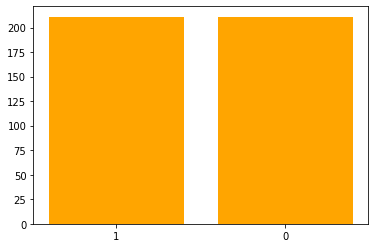

In [ ]:
plt.bar(df_all['class_label'].value_counts().index, df_all['class_label'].value_counts().values, color = "orange")

plt.show()

Explatory data analysis

In [ ]:
df_all.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 2050 columns):
 #     Column       Dtype  
---    ------       -----  
 0     0_x          float32
 1     1            float32
 2     2            float32
 3     3            float32
 4     4            float32
 5     5            float32
 6     6            float32
 7     7            float32
 8     8            float32
 9     9            float32
 10    10           float32
 11    11           float32
 12    12           float32
 13    13           float32
 14    14           float32
 15    15           float32
 16    16           float32
 17    17           float32
 18    18           float32
 19    19           float32
 20    20           float32
 21    21           float32
 22    22           float32
 23    23           float32
 24    24           float32
 25    25           float32
 26    26           float32
 27    27           float32
 28    28           float32
 29    29           float

In [ ]:
df_all.describe().T

,count,mean,std,min,25%,50%,75%,max
0_x,422.0,-0.013192,0.034448,-0.140241,-0.036385,-0.009657,0.002277,0.126273
1,422.0,0.013434,0.100455,-0.410478,-0.044676,0.002512,0.023738,0.345646
2,422.0,0.071876,0.040182,0.009233,0.031474,0.083731,0.093350,0.211367
3,422.0,0.115173,0.098945,0.008025,0.038463,0.085657,0.143502,0.434432
4,422.0,0.024002,0.058864,-0.100951,-0.012897,0.014619,0.045217,0.141499
...,...,...,...,...,...,...,...,...
2043,422.0,0.114691,0.066254,0.000913,0.066868,0.101654,0.141316,0.331038
2044,422.0,0.000361,0.053551,-0.571067,-0.016551,-0.003893,0.018239,0.456137
2045,422.0,0.007913,0.044218,-0.390477,-0.008270,0.001627,0.023837,0.338332
2046,422.0,0.070383,0.055635,0.000349,0.035888,0.063723,0.090566,0.571719


So our data is balanced

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
#Standardizing the Input Features
from sklearn.preprocessing import StandardScaler

In [ ]:
y = df_all['class_label']
X = df_all.drop(['class_label','0_y'], axis = 1)

X.shape


(422, 2048)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
#print(X)

# Separating the dependent and independent variable
  
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state = 40)
# Splitting the data into training and testing data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
print(y, y_test, y_train)

0      1
1      1
2      1
3      1
4      1
      ..
417    0
418    0
419    0
420    0
421    0
Name: class_label, Length: 422, dtype: object 56     1
397    0
198    1
393    0
203    1
      ..
413    0
321    0
339    0
13     1
367    0
Name: class_label, Length: 85, dtype: object 299    0
146    1
118    1
257    0
147    1
      ..
306    0
165    1
7      1
219    0
326    0
Name: class_label, Length: 337, dtype: object


In [ ]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
  
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [ ]:
for keys, values in scores.items():
	print(keys, ':', values)

2 : [0.9109792284866469, 0.8117647058823529]
3 : [0.9228486646884273, 0.8470588235294118]
4 : [0.8635014836795252, 0.7529411764705882]
5 : [0.8753709198813057, 0.7647058823529411]
6 : [0.8071216617210683, 0.7411764705882353]
7 : [0.8130563798219584, 0.7647058823529411]
8 : [0.7477744807121661, 0.7176470588235294]
9 : [0.7626112759643917, 0.7411764705882353]
10 : [0.7062314540059347, 0.6705882352941176]
11 : [0.7270029673590505, 0.6941176470588235]
12 : [0.6706231454005934, 0.6588235294117647]
13 : [0.6824925816023739, 0.6705882352941176]
14 : [0.6231454005934718, 0.6235294117647059]
15 : [0.6379821958456974, 0.6352941176470588]
16 : [0.599406528189911, 0.611764705882353]
17 : [0.6083086053412463, 0.6235294117647059]
18 : [0.5934718100890207, 0.5764705882352941]
19 : [0.599406528189911, 0.5764705882352941]
20 : [0.5727002967359051, 0.5529411764705883]


Here is the plot of the training & testing scores graph

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


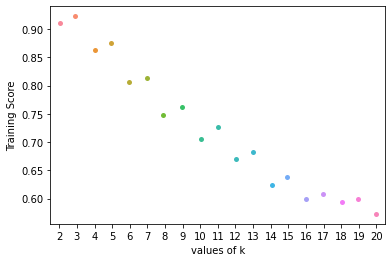

In [ ]:
ax = sns.stripplot(K, training)
ax.set(xlabel ='values of k', ylabel ='Training Score')

plt.show()
# function to show plot


Plotting scatter plot for overlapping

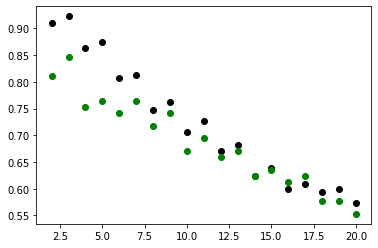

In [ ]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

Value of k is 3

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
clf.score(X_test,y_test)

0.8470588235294118

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

Predictions using the classifier that was fit before

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[43,  0],
       [13, 29]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,43,0,43
1,13,29,42
All,56,29,85


Importing the classification report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        43
           1       1.00      0.69      0.82        42

    accuracy                           0.85        85
   macro avg       0.88      0.85      0.84        85
weighted avg       0.88      0.85      0.84        85



classifying few images using the model.

In [ ]:
def image_feature_extractor(images_path, pickled_db_path="image_feature.pck"):
    files = images_path

    result_2 = {}

    name_2 = os.path.basename(files)
    result_2[name_2] = extract_features(files)
    print(type(result))
        
    
    # saving all our feature vectors in pickled file
    with open(pickled_db_path, 'wb') as fp:
        #fp.writelines('Hello, world')
        pickle.dump(result_2, fp)
    

    pickled_db_path="image_feature.pck"
    with open(pickled_db_path, 'rb') as fp:
        data_2 = pickle.load(fp)
        #print(data)
        names_2 = []
        matrix_2 = []
        for k, v in data_2.items():
            names_2.append(k)
            matrix_2.append(v)
        matrix_2 = np.array(matrix_2)
        names_2 = np.array(names_2)
    
    #let us get the predictions using the classifier we had fit above
    pred = clf.predict(matrix_2)
    def image_class (row):
        if '1' in row['0_y'] :
            return 'banana'
        if '0' in row['0_y'] :
            return 'cassava'
        return '2'


    df1 = pd.DataFrame(names_2)

    df2 = pd.DataFrame(pred)

    df = pd.merge(df1, df2, left_index=True, right_index=True)

    df['prediction'] = df.apply (lambda row: image_class(row), axis=1)

    return df

In [ ]:
y = image_feature_extractor('/Bananas_105.jpg')